In [1]:
import numpy as np
import pandas as pd
import os
from glob import glob
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
all_xray_df = pd.read_csv('data/Data_Entry_2017.csv')
all_image_paths = {os.path.basename(x): x for x in glob(os.path.join('', 'data', 'images*', '*', '*.png'))}
print('Scans found:', len(all_image_paths), ', Total Headers', all_xray_df.shape[0])
all_xray_df['path'] = all_xray_df['Image Index'].map(all_image_paths.get)
all_xray_df['Patient Age'] = all_xray_df['Patient Age'].map(lambda x: int(x))
all_xray_df.sample(3)

Scans found: 112120 , Total Headers 112120


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11,path
61886,00015304_001.png,Cardiomegaly|Consolidation,1,15304,61,F,AP,2048,2500,0.168,0.168,NaN,data/images_007/images/00015304_001.png
36342,00009596_000.png,No Finding,0,9596,68,M,PA,2500,2048,0.168,0.168,NaN,data/images_005/images/00009596_000.png
38211,00010007_130.png,Consolidation,130,10007,58,M,AP,2048,2500,0.168,0.168,NaN,data/images_005/images/00010007_130.png


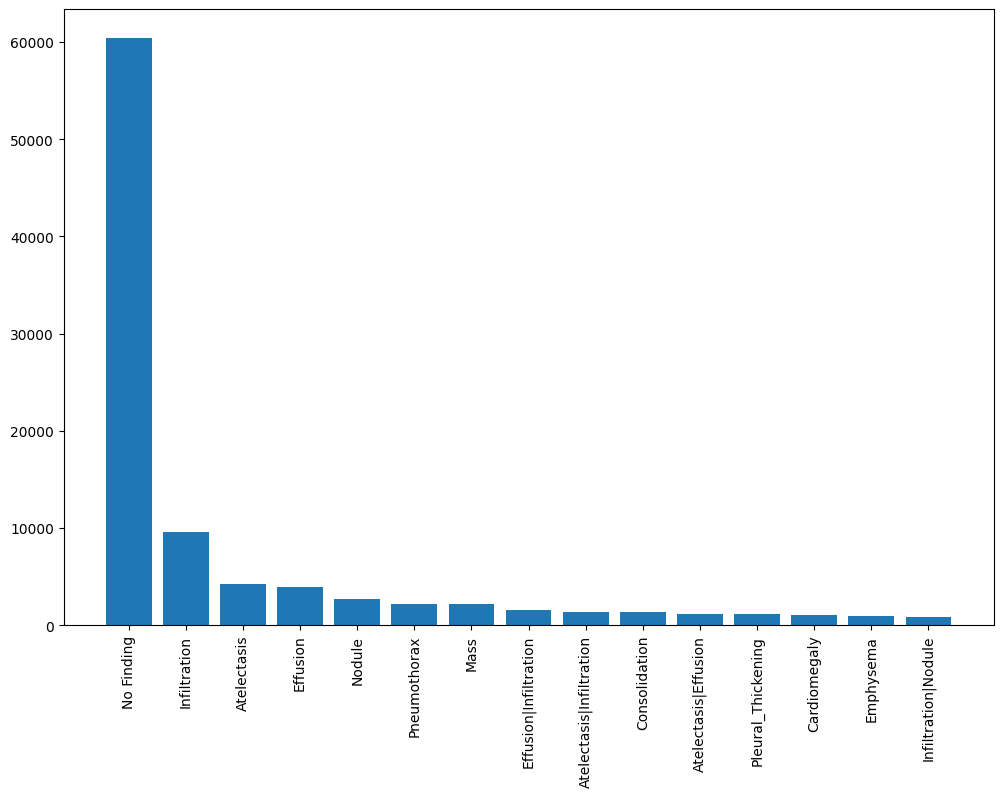

In [3]:
label_counts = all_xray_df['Finding Labels'].value_counts()[:15]
fig, ax1 = plt.subplots(1,1,figsize = (12, 8))
ax1.bar(np.arange(len(label_counts)) + 0.5, label_counts)
ax1.set_xticks(np.arange(len(label_counts)) + 0.5)
_ = ax1.set_xticklabels(label_counts.index, rotation = 90)
plt.show()

In [4]:
all_xray_df['Finding Labels'] = all_xray_df['Finding Labels'].map(lambda x: x.replace('No Finding', ''))
from itertools import chain
all_labels = np.unique(list(chain(*all_xray_df['Finding Labels'].map(lambda x: x.split('|')).tolist())))
all_labels = [x for x in all_labels if len(x) > 0]
print(f'All Labels ({len(all_labels)}): {all_labels}')
for c_label in all_labels:
    if len(c_label) > 1:
        all_xray_df[c_label] = all_xray_df['Finding Labels'].map(lambda finding: 1.0 if c_label in finding else 0)
all_xray_df.sample(3)

All Labels (14): [np.str_('Atelectasis'), np.str_('Cardiomegaly'), np.str_('Consolidation'), np.str_('Edema'), np.str_('Effusion'), np.str_('Emphysema'), np.str_('Fibrosis'), np.str_('Hernia'), np.str_('Infiltration'), np.str_('Mass'), np.str_('Nodule'), np.str_('Pleural_Thickening'), np.str_('Pneumonia'), np.str_('Pneumothorax')]


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
87215,00021533_000.png,,0,21533,26,F,PA,2992,2991,0.143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91677,00022864_001.png,,1,22864,72,F,PA,2846,2991,0.143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5149,00001373_053.png,Atelectasis|Effusion|Infiltration,53,1373,60,M,AP,3056,2544,0.139,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# at least 1000 cases
MIN_CASES = 1000
all_labels = [c_label for c_label in all_labels if all_xray_df[c_label].sum()>MIN_CASES]
print(f'Clean Labels ({len(all_labels)})', [(c_label, int(all_xray_df[c_label].sum())) for c_label in all_labels])

Clean Labels (13) [(np.str_('Atelectasis'), 11559), (np.str_('Cardiomegaly'), 2776), (np.str_('Consolidation'), 4667), (np.str_('Edema'), 2303), (np.str_('Effusion'), 13317), (np.str_('Emphysema'), 2516), (np.str_('Fibrosis'), 1686), (np.str_('Infiltration'), 19894), (np.str_('Mass'), 5782), (np.str_('Nodule'), 6331), (np.str_('Pleural_Thickening'), 3385), (np.str_('Pneumonia'), 1431), (np.str_('Pneumothorax'), 5302)]


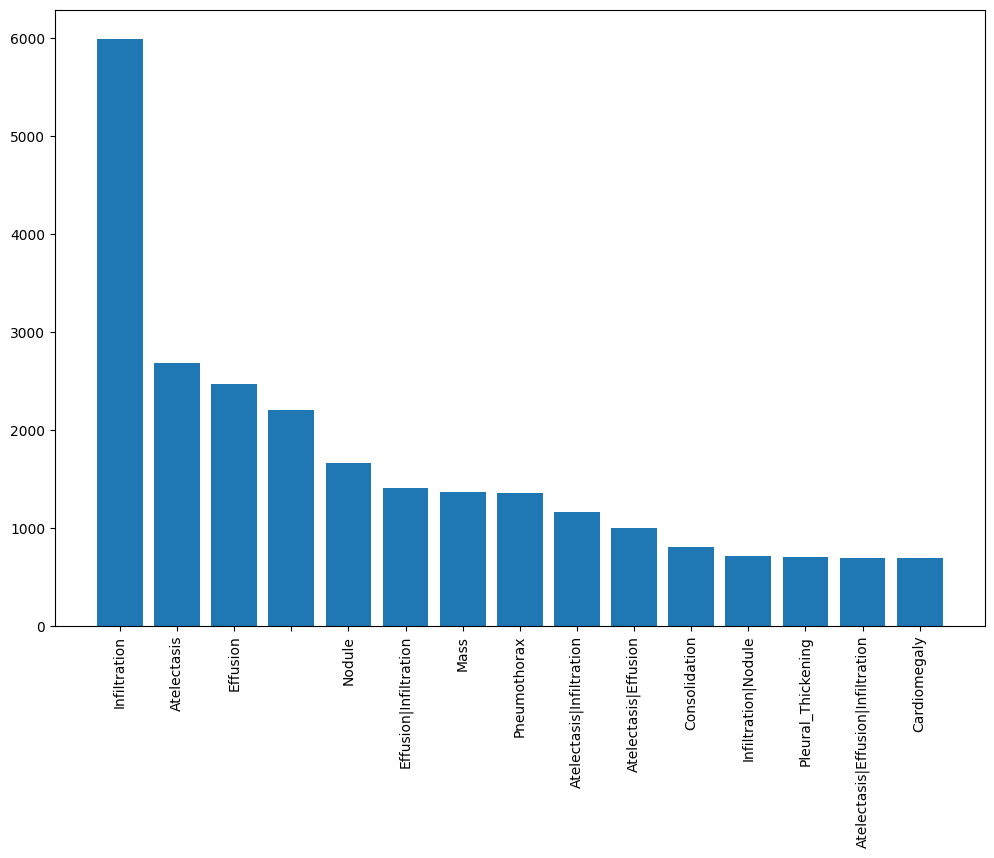

In [6]:
sample_weights = all_xray_df['Finding Labels'].map(lambda x: len(x.split('|')) if len(x) > 0 else 0).values + 4e-2
sample_weights /= sample_weights.sum()
all_xray_df = all_xray_df.sample(40000, weights=sample_weights)

label_counts = all_xray_df['Finding Labels'].value_counts()[:15]
fig, ax1, = plt.subplots(1,1,figsize = (12, 8))
ax1.bar(np.arange(len(label_counts)) + 0.5, label_counts)
ax1.set_xticks(np.arange(len(label_counts)) + 0.5)
_ = ax1.set_xticklabels(label_counts.index, rotation = 90)
plt.show()

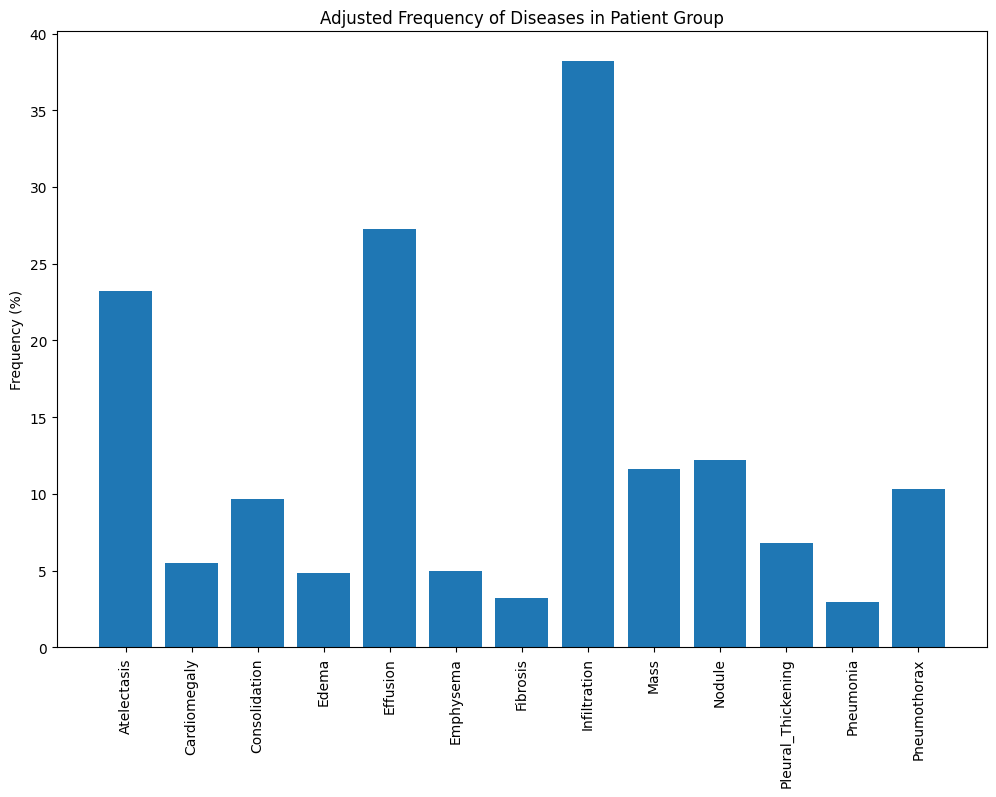

In [7]:
label_counts = 100*np.mean(all_xray_df[all_labels].values,0)
fig, ax1 = plt.subplots(1,1,figsize = (12, 8))
ax1.bar(np.arange(len(label_counts)) + 0.5, label_counts)
ax1.set_xticks(np.arange(len(label_counts)) + 0.5)
ax1.set_xticklabels(all_labels, rotation = 90)
ax1.set_title('Adjusted Frequency of Diseases in Patient Group')
_ = ax1.set_ylabel('Frequency (%)')
plt.show()

In [8]:
all_xray_df['disease_vec'] = all_xray_df.apply(lambda x: [x[all_labels].values], 1).map(lambda x: x[0])

In [9]:
from sklearn.model_selection import train_test_split

train_df, valid_df = train_test_split(all_xray_df, test_size = 0.25, random_state = 2018, stratify = all_xray_df['Finding Labels'].map(lambda x: x[:4]))
print('train', train_df.shape[0], 'validation', valid_df.shape[0])

train 30000 validation 10000


In [10]:
import torch
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image

IMG_SIZE = (128, 128)

# Original code using tensorflow keras
# core_idg = ImageDataGenerator(samplewise_center=True, 
#                               samplewise_std_normalization=True, 
#                               horizontal_flip = True, 
#                               vertical_flip = False, 
#                               height_shift_range= 0.05, 
#                               width_shift_range=0.1, 
#                               rotation_range=5, 
#                               shear_range = 0.1,
#                               fill_mode = 'reflect',
#                               zoom_range=0.15)

# Altered the above code with PyTorch

class StandardizePerImage:
    def __call__(self, img):
        img_array = np.array(img).astype(np.float32)

        if len(img_array.shape) == 2:
            img_array = img_array[:, :, np.newaxis]
        
        mean = img_array.mean()
        std = img_array.std()
        if std > 0:
            img_array = (img_array - mean) / std
            
        return torch.from_numpy(img_array.transpose((2, 0, 1)))

img_transformer = transforms.Compose([
    transforms.Resize(IMG_SIZE), # Resize imgs to IMG_SIZE
    transforms.RandomHorizontalFlip(), # Randomly flip images horizontally
    transforms.RandomAffine(
        degrees=5, # Randomly shift by up to 5 degrees
        translate=(0.1, 0.05), # Shift horizontally by 0.1, vertically by 0.05
        shear=10, 
        scale=(.85, 1.15),
        fill=0
    ), 
    StandardizePerImage() # Call the above defined class to standardize each image
])

# dataset = datasets.ImageFolder

In [11]:
# Tensorflow Keras Version
# -----------
# def flow_from_dataframe(img_data_gen, in_df, path_col, y_col, **dflow_args):
#     base_dir = os.path.dirname(in_df[path_col].values[0])
#     print(base_dir)
#     print('## Ignore next message from keras, values are replaced anyways')
#     df_gen = img_data_gen.flow_from_directory(base_dir, 
#                                      class_mode = 'sparse',
#                                     **dflow_args)
#     df_gen.filenames = in_df[path_col].values
#     df_gen.classes = np.stack(in_df[y_col].values)
#     df_gen.samples = in_df.shape[0]
#     df_gen.n = in_df.shape[0]
#     df_gen._set_index_array()
#     df_gen.directory = '' # since we have the full path
#     print('Reinserting dataframe: {} images'.format(in_df.shape[0]))
#     return df_gen

# PyTorch Modified Version
class DataFrameDataset(Dataset):
    """PyTorch Dataset that loads images from paths in a DataFrame"""

    def __init__(self, dataframe, path_col, y_col, transform=None):
        """
        Args:
            dataframe: Pandas DataFrame with image paths and labels
            path_col: Name of column containing image paths
            y_col: Name of column containing labels
            transform: PyTorch transforms to apply to the images
        """
        self.dataframe = dataframe
        self.path_col = path_col
        self.y_col = y_col
        self.transform = transform
        self.image_paths = dataframe[path_col].values

        # Convert labels to tensors
        # First check what type the labels are
        if isinstance(dataframe[y_col].iloc[0], (list, np.ndarray)):
            # If they're lists or arrays, convert to tensor
            self.labels = [torch.tensor(np.array(label, dtype=np.float32), dtype=torch.float32) for label in dataframe[y_col]]
        else:
            # For scalar values
            self.labels = torch.tensor(dataframe[y_col].values, dtype=torch.float32)
            
        print(f'Created dataset with {len(self.dataframe)} images')

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('L') # grayscale
        label = self.labels[idx]
        
        if self.transform:
            image = self.transform(image)
            
        return image, label

def create_dataframe_loader(dataframe, path_col, y_col, transform, **dataloader_args):
    """
    Creates a DataLoader from a DataFrame.
    
    Args:
        dataframe: Pandas DataFrame with image paths and labels
        path_col: Name of column containing image paths
        y_col: Name of column containing labels
        transform: PyTorch transforms to apply to the images
        **dataloader_args: Arguments to pass to the DataLoader
        
    Returns:
        PyTorch DataLoader
    """
    dataset = DataFrameDataset(
        dataframe=dataframe,
        path_col=path_col,
        y_col=y_col,
        transform=transform
    )
    
    # Default arguments
    batch_size = dataloader_args.pop('batch_size', 32)
    shuffle = dataloader_args.pop('shuffle', True)
    num_workers = dataloader_args.pop('num_workers', 1)
    
    dataloader = DataLoader(
        dataset,
        batch_size=batch_size,
        shuffle=shuffle,
        num_workers=num_workers,
        **dataloader_args
    )
    
    return dataloader

In [12]:
train_gen = create_dataframe_loader(
    dataframe=train_df,
    path_col='path',
    y_col='disease_vec',
    transform=img_transformer,
    batch_size=32,
    shuffle=True
)

valid_gen = create_dataframe_loader(
    dataframe=valid_df,
    path_col='path',
    y_col='disease_vec',
    transform=img_transformer,
    batch_size=256,
    shuffle=True
)

valid_loader = create_dataframe_loader(
    dataframe=valid_df,
    path_col='path',
    y_col='disease_vec',
    transform=img_transformer,
    batch_size=1024,
    shuffle=True
)

test_X, test_Y = next(iter(valid_loader))

Created dataset with 30000 images
Created dataset with 10000 images
Created dataset with 10000 images


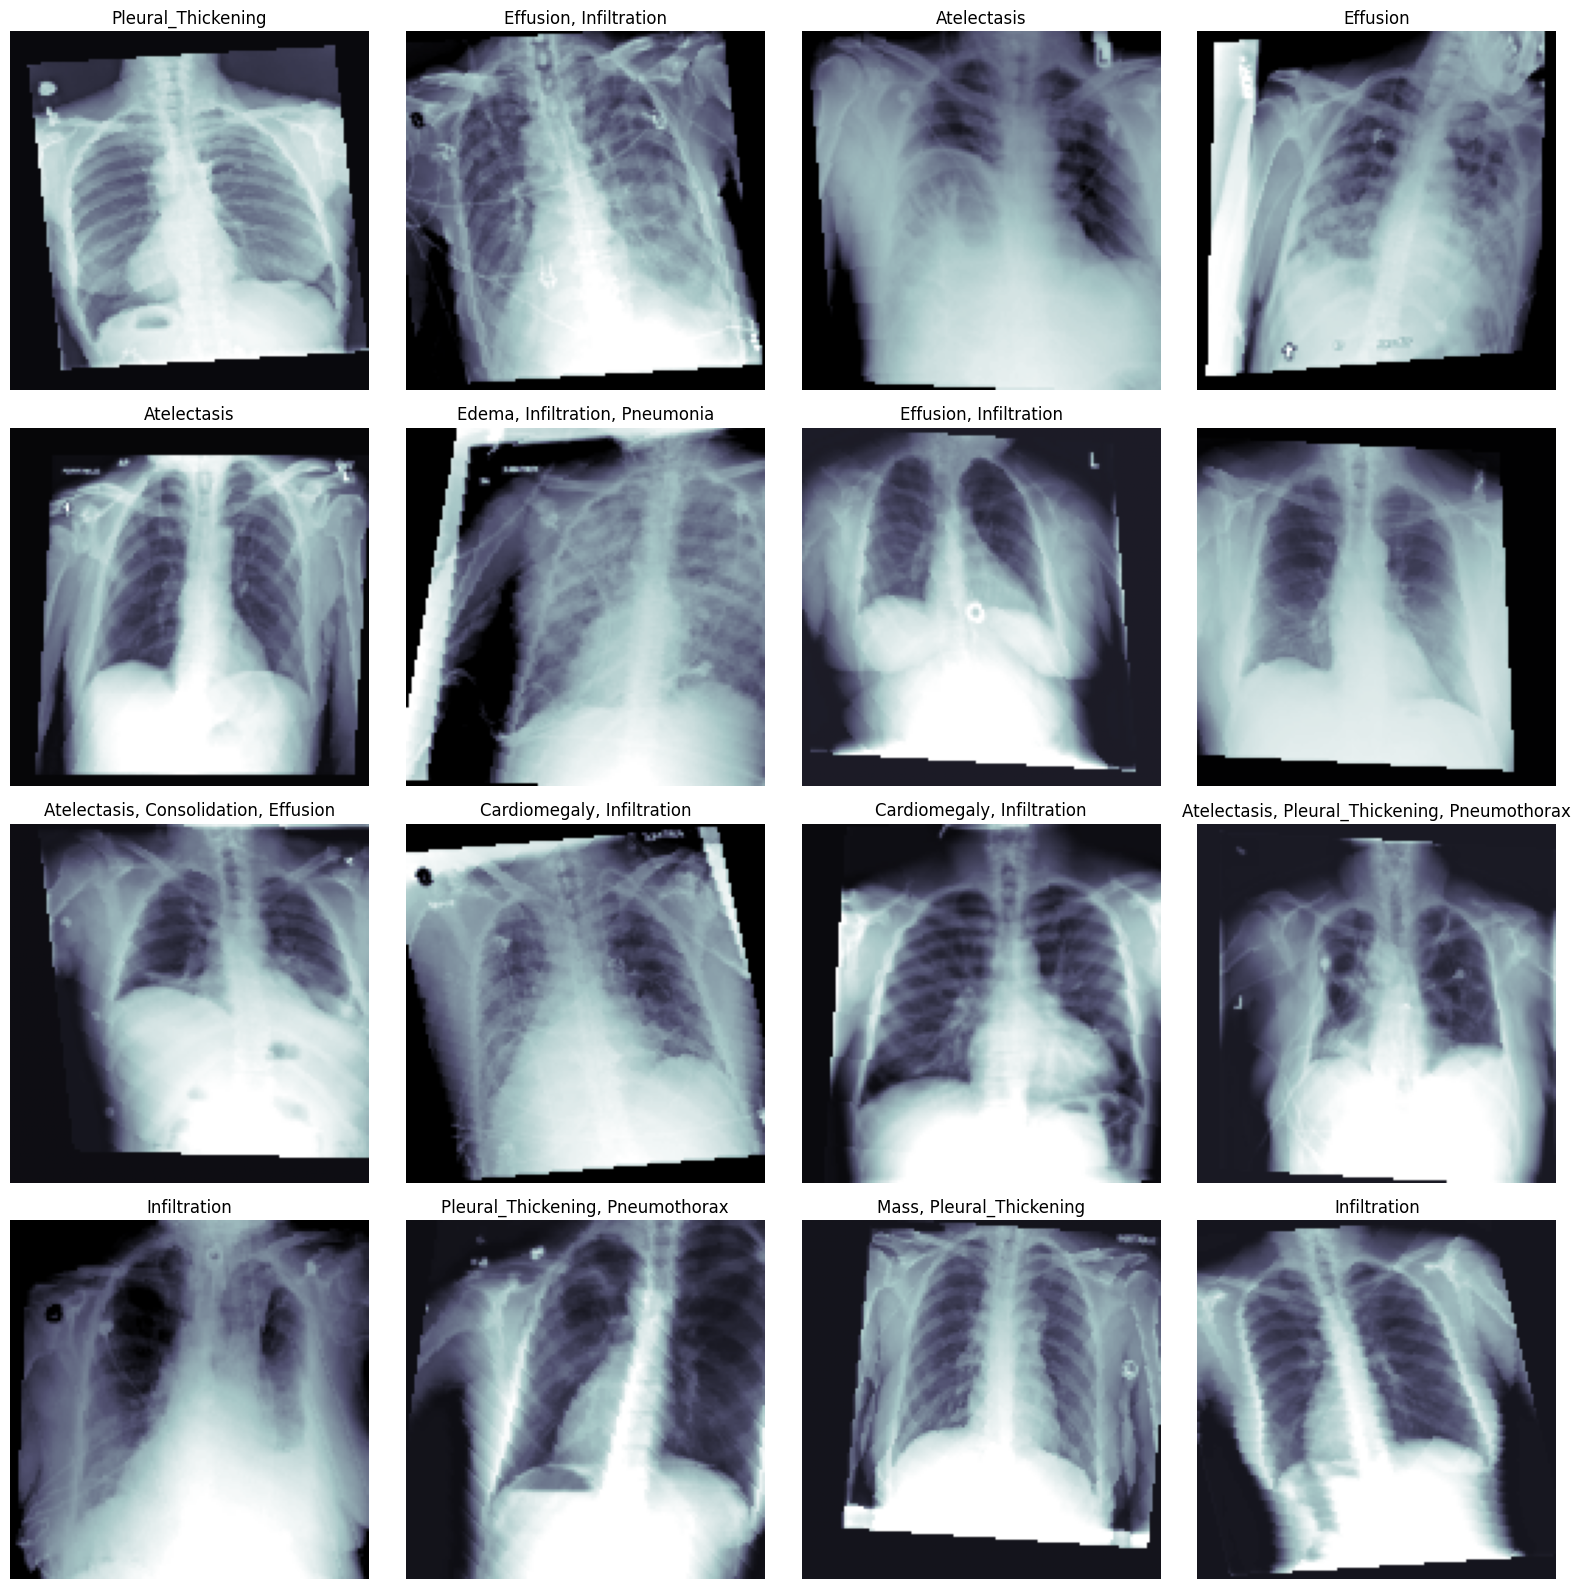

In [13]:
t_x, t_y = next(iter(train_gen))
fig, m_axs = plt.subplots(4, 4, figsize = (16, 16))
for (c_x, c_y, c_ax) in zip(t_x, t_y, m_axs.flatten()):
    
    c_x_np = c_x.numpy().transpose(1, 2, 0)  # Convert to [height, width, channels]
    
    # If it's a single channel image
    if c_x_np.shape[2] == 1:
        c_ax.imshow(c_x_np[:,:,0], cmap = 'bone', vmin = -1.5, vmax = 1.5)
    else:
        c_ax.imshow(c_x_np, cmap = 'bone', vmin = -1.5, vmax = 1.5)
        
    c_ax.set_title(', '.join([n_class for n_class, n_score in zip(all_labels, c_y) 
                             if n_score>0.5]))
    c_ax.axis('off')
    
plt.tight_layout()
plt.show()

In [14]:
import torch.nn as nn
from torchvision.models import mobilenet_v3_small, MobileNet_V3_Small_Weights

base_mobilenet = mobilenet_v3_small(weights=MobileNet_V3_Small_Weights.IMAGENET1K_V1)

base_features = base_mobilenet.features

model = nn.Sequential(
    base_features,
    nn.AdaptiveAvgPool2d(1),
    nn.Flatten(),
    nn.Dropout(0.5),
    nn.Linear(base_mobilenet.classifier[0].in_features, 512),
    nn.Hardswish(),
    nn.Dropout(0.5),
    nn.Linear(512, len(all_labels)),
    nn.Sigmoid()
)

criterion = nn.BCELoss() # Binary Cross Entropy
optimizer = torch.optim.Adam(model.parameters()) # Use ADAM as the optimizer

In [15]:
from torch.optim.lr_scheduler import ReduceLROnPlateau

steps_per_epoch = 100
num_epochs = 1
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model.to(device)

weight_path = 'xray_class_weights.best.pth'
best_val_loss = float('inf')
patience_counter = 0

scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=2, verbose=True)

/data/class/cs175b/esnam/.conda/envs/pytorch/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


In [16]:
def train(model, train_gen, criterion, optimizer, test_X, test_Y, best_val_loss, weight_path, steps_per_epoch=100, num_epochs=1, patience=3):
    
    patience_counter = 0

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
    
        # Training phase w/ train_gen
        for i, (inputs, labels) in enumerate(train_gen):
            if i >= steps_per_epoch:
                break
    
            inputs = inputs.to(device)
            labels = labels.to(device)
    
            inputs = inputs.repeat(1, 3, 1, 1) # Convert 1-channel to 3-channel
    
            # Zero the parameter gradients
            optimizer.zero_grad()
    
            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)
    
            # Backward pass
            loss.backward()
            optimizer.step()
    
            running_loss += loss.item()
    
        epoch_loss = running_loss / steps_per_epoch
        print(f'Epoch {(epoch + 1)}/{num_epochs}, Training Loss: {epoch_loss:.4f}')
    
        # Validation phase using test_X and test_Y
        model.eval()
        with torch.no_grad():
            test_X = test_X.to(device)
            test_Y = test_Y.to(device)
    
            test_X = test_X.repeat(1, 3, 1, 1)
            
            outputs = model(test_X)
            val_loss = criterion(outputs, test_Y)
            print(f'Validation Loss: {val_loss.item():.4f}')
    
        # Learning rate scheduler
        scheduler.step(val_loss)
    
        # Checkpoint saving
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), weight_path)
            print(f'Validation loss improved to {val_loss.item():.5f}, saving model')
            patience_counter = 0
        else:
            patience_counter += 1
    
        if patience_counter >= patience:
            print('Early stopping triggered')
            break

In [ ]:
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    # Training phase w/ train_gen
    for i, (inputs, labels) in enumerate(train_gen):
        if i >= steps_per_epoch:
            break

        inputs = inputs.to(device)
        labels = labels.to(device)

        inputs = inputs.repeat(1, 3, 1, 1) # Convert 1-channel to 3-channel

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    epoch_loss = running_loss / steps_per_epoch
    print(f'Epoch {(epoch + 1)}/{num_epochs}, Training Loss: {epoch_loss:.4f}')

    # Validation phase using test_X and test_Y
    model.eval()
    with torch.no_grad():
        test_X = test_X.to(device)
        test_Y = test_Y.to(device)

        test_X = test_X.repeat(1, 3, 1, 1)
        
        outputs = model(test_X)
        val_loss = criterion(outputs, test_Y)
        print(f'Validation Loss: {val_loss.item():.4f}')

    # Learning rate scheduler
    scheduler.step(val_loss)

    # Checkpoint saving
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), weight_path)
        print(f'Validation loss improved to {val_loss.item():.5f}, saving model')
        patience_counter = 0
    else:
        patience_counter += 1

    if patience_counter >= patience:
        print('Early stopping triggered')
        break


In [17]:
train(model, train_gen, criterion, optimizer, test_X, test_Y, best_val_loss, weight_path)

Epoch 1/1, Training Loss: 0.3478
Validation Loss: 0.3343
Validation loss improved to 0.33432, saving model


In [17]:
for c_label, s_count in zip(all_labels, 100*torch.mean(test_Y, dim=0).cpu()):
    print('%s: %2.2f%%' % (c_label, s_count))

Atelectasis: 20.41%
Cardiomegaly: 3.91%
Consolidation: 7.03%
Edema: 4.79%
Effusion: 25.98%
Emphysema: 5.47%
Fibrosis: 3.32%
Infiltration: 39.26%
Mass: 12.89%
Nodule: 12.30%
Pleural_Thickening: 7.52%
Pneumonia: 2.93%
Pneumothorax: 9.67%


In [29]:
def predict(model, inputs, batch_size=32, verbose=True):
    # Set the model to evaluation mode
    model.eval()

    device = next(model.parameters()).device

    if not torch.is_tensor(inputs):
        inputs = torch.tensor(inputs, dtype=torch.float32)

    all_outputs = []

    # Process in batches
    num_samples = inputs.shape[0]
    num_batches = (num_samples + batch_size - 1) // batch_size

    with torch.no_grad():
        for i in range(num_batches):
            # Get batch
            start_idx = i * batch_size
            end_idx = min((i + 1) * batch_size, num_samples)
            batch = inputs[start_idx:end_idx].to(device)

            if batch.size(1) == 1:
                batch = batch.repeat(1, 3, 1, 1)

            # Forward pass
            outputs = model(batch)

            # Move outputs to CPU and convert to numpy
            all_outputs.append(outputs.cpu())

            # Print progress if verbose
            if verbose and (i + 1) % 10 == 0:
                print(f'Processed {end_idx}/{num_samples} samples')

    # Concat all batch outputs
    all_outputs = torch.cat(all_outputs, dim=0)

    if verbose:
        print(f'Prediction complete. Processed {num_samples} samples.')

    return all_outputs.numpy()

In [30]:
pred_Y = predict(model, test_X, batch_size=32, verbose=True)

Processed 320/1024 samples
Processed 640/1024 samples
Processed 960/1024 samples
Prediction complete. Processed 1024 samples.


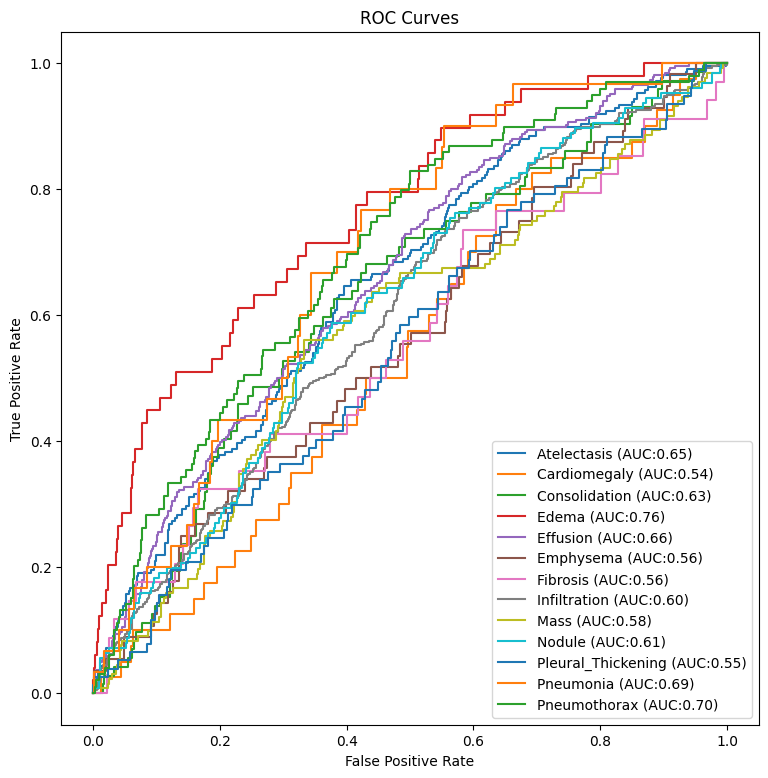

In [31]:
from sklearn.metrics import roc_curve, auc

fig, c_ax = plt.subplots(1, 1, figsize=(9, 9))
for (idx, c_label) in enumerate(all_labels):
    fpr, tpr, thresholds = roc_curve(test_Y[:, idx].numpy().astype(int), pred_Y[:, idx])
    c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)' % (c_label, auc(fpr, tpr)))
c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
c_ax.set_title('ROC Curves')
fig.savefig('barely_trained_net.png')
plt.show()